In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
# Defining the paths to the clean audio and noise audio folders
clean_audio_folder = 'clean_audio'
noise_audio_folder = 'noise_audio'
trimmed_clean_folder = 'trimmed_clean_audio'
trimmed_noise_folder = 'trimmed_noise_audio'
output_folder = 'noised_speech'

In [5]:
noise_speech = glob(os.path.join(output_folder, '*.wav'))

In [6]:
# Playing audio file
ipd.Audio(noise_speech[1])

In [20]:
noisy_speech, noisy_speech_sr = librosa.load(noise_speech[1], sr=None)

Mel Spectogram

In [21]:
Mel_S = librosa.feature.melspectrogram(y=noisy_speech,
                                   sr=noisy_speech_sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(Mel_S, ref=np.max)

In [22]:
Mel_S.shape

(256, 92)

In [30]:
def plot_spect(y, title):
    # Plot the mel spectogram
    fig, ax = plt.subplots(figsize=(10, 5))
    img = librosa.display.specshow(S_db_mel,
                                x_axis='time',
                                y_axis='log',
                                ax=ax)
    ax.set_title(title, fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()

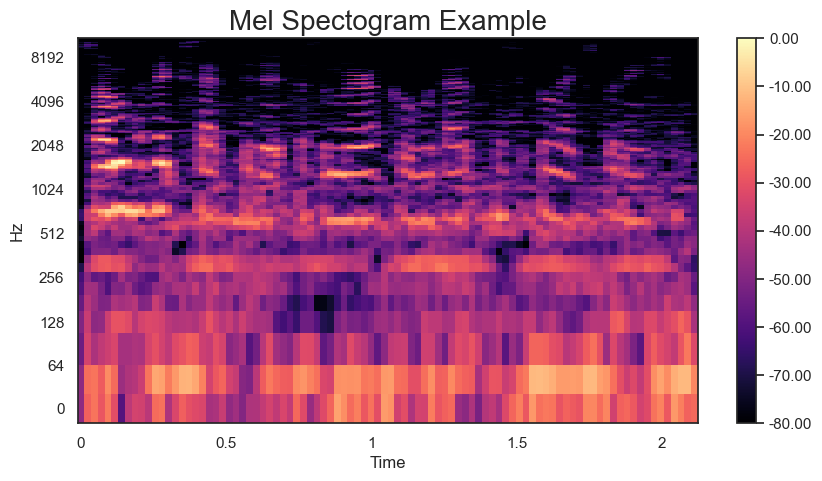

In [23]:
plot_spect(Mel_S, 'Mel Spectogram Example')

In [24]:
Mel_A = librosa.feature.inverse.mel_to_audio(Mel_S)

In [25]:
sf.write('mel_constructed.wav', Mel_A, 16000)

In [27]:
constructed_audio = glob('*.wav')
constructed_audio

['constructed.wav', 'mel_constructed.wav']

In [28]:
# Playing audio file
ipd.Audio(constructed_audio[1])

STFT spectogram

In [29]:
D = librosa.stft(noisy_speech)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 92)

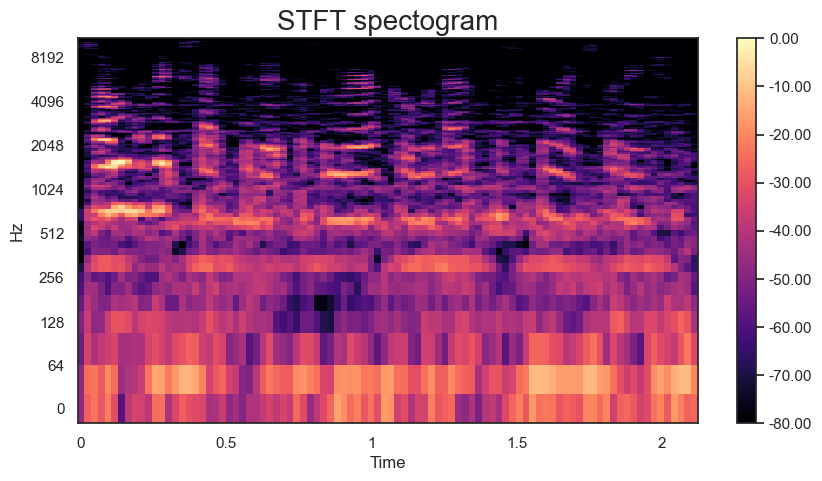

In [31]:
plot_spect(S_db, 'STFT spectogram')

In [32]:
STFT_A = librosa.istft(S_db)

In [33]:
sf.write('stft_constructed.wav', STFT_A, 16000)

In [34]:
constructed_audio = glob('*.wav')
constructed_audio

['constructed.wav', 'mel_constructed.wav', 'stft_constructed.wav']

In [39]:
# Playing audio file
ipd.Audio(constructed_audio[2])

STFT is not suitable

We will be working with Mel spectogram

# min max normalization

In [54]:
Mel_S[0].min()

0.45317212

In [42]:
Mel_S[0].max()

68.70216

In [49]:
Mel_S.shape

(256, 92)

In [53]:
norm_Mel_S = []
for array in Mel_S:
    norm_array = (array-array.min()) / (array.max()- array.min())
    norm_Mel_S.append(norm_array)
norm_Mel_S = np.array(norm_Mel_S)
norm_Mel_S

0.0

In [55]:
Norm_Mel_A = librosa.feature.inverse.mel_to_audio(norm_Mel_S)
sf.write('normmel_constructed.wav', Mel_A, 16000)
constructed_audio = glob('*.wav')
constructed_audio

['constructed.wav',
 'mel_constructed.wav',
 'normmel_constructed.wav',
 'stft_constructed.wav']

In [59]:
# Playing audio file
ipd.Audio(constructed_audio[1])

Min max denormalization